# <a href="https://thetahat.ru/courses/ad" target="_top">Введение в анализ данных</a>
## Домашнее задание 9. Статистика и байесовские классификаторы.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@thetahat_ds25_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания всем участникам списывания дается штраф -2 балла к итоговой оценке за семестр.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Обратите внимание на <a href="https://thetahat.ru/courses/ai-rules"><b>правила использования ИИ-инструментов</b></a> при решении домашнего задания.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"><img src="https://miptstats.github.io/theta_grader_small.png" style="display: inline; vertical-align: middle;"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Правила оформления теоретических задач:**

* Решения необходимо оформить в виде $\LaTeX$ в markdown-ячейках. Иные способы (в т.ч. фотографии) не принимаются.
* Если вы не знаете $\LaTeX$, используйте ИИ-инструменты для оформления черновика решения. Примеры были показаны на лекции 2 по ИИ-инструментам.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко.
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.


<b><font size="5" color="red">Важно!!! Правила заполнения ноутбука:</font></b>
* Запрещается удалять имеющиеся в ноутбуке ячейки, менять местами положения задач.
* Сохраняйте естественный линейный порядок повествования в ноутбуке сверху-вниз.
* Отвечайте на вопросы, а также добавляйте новые ячейки в предложенных местах, которые обозначены `...`.
* В markdown-ячейка, содержащих описание задачи, находятся специальные отметки, которые <font color="red"><b>запрещается модифицировать</b></font>.
* При нарушении данных правил работа может получить 0 баллов.



**Баллы за задание:**

* Задача 3 &mdash; 30 баллов
* Задача 4 &mdash; 30 баллов
* Задача 3 &mdash; 50 баллов
* Задача 4 &mdash; 40 баллов

Баллы учитываются в <b><font color="green">факультативной части</font></b> курса и не влияют на оценку по основной части.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import torch

warnings.simplefilter("ignore")

from datasets import Dataset

from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, hamming_loss



from transformers import AutoTokenizer
from transformers import TrainingArguments, Trainer
from transformers import EvalPrediction
from transformers import AutoModelForSequenceClassification

sns.set(palette="Set2")

---
### Задача 1.   
---

**a).** Пусть $X_1,...,X_n$ выборка из некоторого распределения $\mathsf{P}$, причем ${\sf D} X_1=\sigma^2<+\infty$, и $\sigma$ неизвестно.
Рассмотрим оценку $S^2 = \overline{X^2}-\overline{X}^2$ дисперсии $\sigma^2$.

Докажите, что $S^2=\frac1n\sum\limits_{i=1}^n\left(X_i-\overline{X}\right)^2$.

**b).** Оценка $\widehat{\theta}$ называется несмещенной оценкой параметра $\theta$ если для любого $\theta \in \Theta$ выполнено $\mathsf{E}_\theta \widehat{\theta} = \theta$. Иначе говоря, какое бы ни оказалось истинное значение параметра $\theta$, рассматривая оценку $\widehat{\theta}$ в среднем будем получать именно $\theta$.

Является ли статистика $S^2$ несмещенной оценкой $\sigma^2$?

*Подсказка.* Посчитайте математическое ожидание случайной величины $S^2$. Используйте для этого известные вам свойства математического ожидания.

**a).** $\sum_{i=1}^n\left(X_i-\overline{X}\right)^2=\sum_{i=1}^n(X_i^2-2X_i \overline X+\overline{X}^2)=\sum_{i=1}^n X_i^2-2\overline{X}\sum_{i=1}^n X_i+n\overline{X}^2=n(\overline{X^2}-2\overline{X}^2+\overline{X}^2)=n(\overline{X^2}-\overline{X}^2)$ \
Откуда $S^2=\frac1n\sum\limits_{i=1}^n\left(X_i-\overline{X}\right)^2$ 


**b).** Покажем что наша статистика $S^2$ является смещенной оценкой $\sigma^2$,обозначим $\mathsf{E}X_i=\mu$
$$\mathsf{E}S^2=\mathsf{E}\left[\frac{1}{n}\sum_{i=1}^n\left(X_i-\frac{1}{n}\sum_{j=1}^n X_j\right)^2\right]=\sum_{i=1}^n\frac{1}{n} \mathsf{E}\left[X_i^2-\frac{2}{n}X_i \sum_{j=1}^n X_j +\frac{1}{n^2}\sum_{j=1}^n X_j\sum_{k=1}^n X_k\right]= \sum_{i=1}^n \frac{1}{n}\left(\mathsf{E}[X_i^2]-\frac{2}{n}\left(\sum_{i\neq j}\mathsf{E}[X_i X_j]+\mathsf{E}[X_i^2]\right)+\frac{1}{n^2}\sum_{j=1}^n \sum_{k\neq j}^n \mathsf{E}[X_j X_k]+\frac{1}{n^2}\sum_{j=1}^n \mathsf{E}[X_j^2]\right)=\frac{1}{n}\sum_{i=1}^n \left(\frac{n-2}{n}\mathsf{E}[X_i^2]-\frac{2}{n}\sum_{j\neq i}E[X_i X_j]+\frac{1}{n^2}\sum_{j=1}^n\sum_{k\neq j}^n \mathsf{E}[X_j X_k]+\frac{1}{n^2}\sum_{j=1}^n \mathsf{E}[X_j^2]\right)=\frac{1}{n}\sum_{i=1}^n \left(\frac{n-2}{n}(\sigma^2+\mu^2)-\frac{2}{n}(n-1)\mu^2+\frac{n-1}{n}\mu^2 +\frac{1}{n}(\sigma^2+\mu^2)\right)=\frac{n-1}{n}\sigma^2$$
Таким образом $\mathsf{E}S^2 =\frac{n-1}{n}\sigma^2$, оценка смещенная получилась

 ---
### Задача 2.   
---
Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $\mathcal{N}(0, \sigma^2)$. В качестве оценок $\sigma^2$ обычно используют $S^2$ или $\frac{n}{n-1}S^2$. Что можно сказать про их несмещенность?

**Ответ:** Из задачи 1, мы понимаем, что оценка $S^2$ будет смещенной, а оценка $\frac{n}{n-1}S^2$ несмещенной

**1.** Теперь проверьте это на практике. Для каждой из приведенных выше оценок $\widehat{\theta}$ выполните следующие действия.

* Вычислите $k = 500$ независимых оценок $\widehat{\theta}_1, ... , \widehat{\theta}_k$ по независимым выборкам $(X_1^1, ... , X_n^1), ... , (X_1^k, ... , X_n^k)$, сгенерированным из распределения $\mathcal{N}(0, \sigma^2)$. Для генерации выберите какое-то истинное значение $\sigma$. Далее вычислите среднее этих оценок, которое обозначим $\widetilde{\theta}$.

* Визуализируйте полученные значения, построив на **одном** графике точки $(\widehat{\theta}_1, $y$), ... , (\widehat{\theta}_k, y)$ и среднее оценок $(\widetilde{\theta}, y)$, где $y$ &mdash; произвольные различные (например, 0 и 1) координаты для двух различных типов оценок.

* Повторите действие три раза для $n \in \{10, 100, 500\}$. В итоге получится три графика для различных $n$, на каждом из которых изображено поведение двух типов оценок и их среднее.

Используйте приведенный ниже **шаблон** для визуализации значений.

**Внимание!** Следите за информативностью и наглядностью графиков. Например, пустых пространств должно быть как можно меньше, ничего не должно быть скомкано, вся нужная информация должна быть представлена. Посмотрите <a href="https://thetahat.ru/files/ad/main/2/design_hw.pdf"  target="_top">презентацию</a> по оформлению домашних заданий. **Если график чему-то не удовлетворяет, оценка будет снижена.**


In [3]:
def plot(k, n, S):
    # Вначале:
    plt.figure(figsize=(10, 5))

    colors = ["r", "g"]
    labels = ["S", r"$\frac{n}{n-1}S$"]

    # Для каждой оценки:
    # y - номер оценки
    for y in [0, 1]:
        plt.scatter(
            S[y], np.zeros(k) + y, alpha=0.1, s=100, color=colors[y], label=labels[y]
        )
        plt.scatter(S[y].mean(), y, marker="*", s=200, color="w", edgecolors="black")

    # Для всего графика:
    plt.vlines(1, 0, 1, color="r")
    plt.title(f"Размер выборки = {n}")
    plt.yticks([])
    plt.legend()

**Решение:**

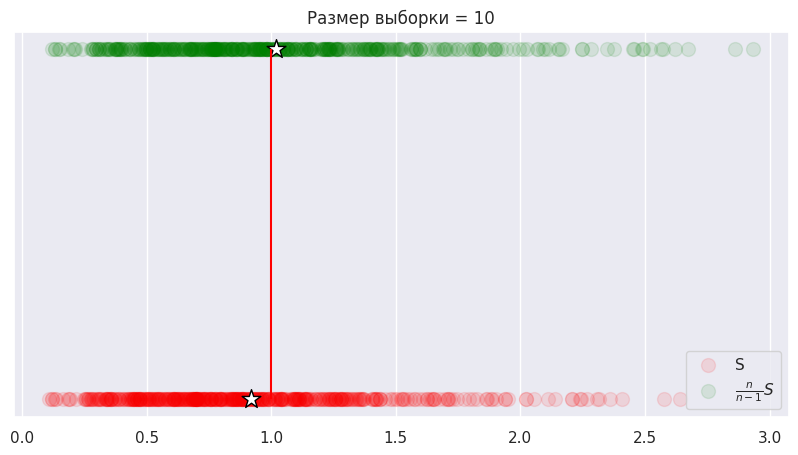

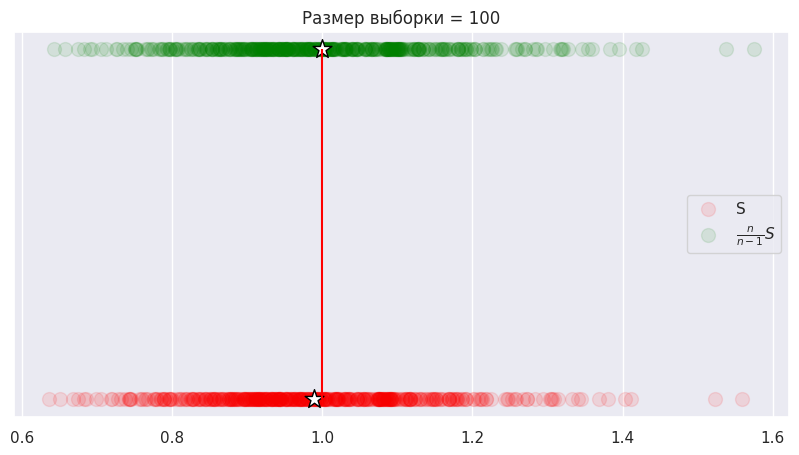

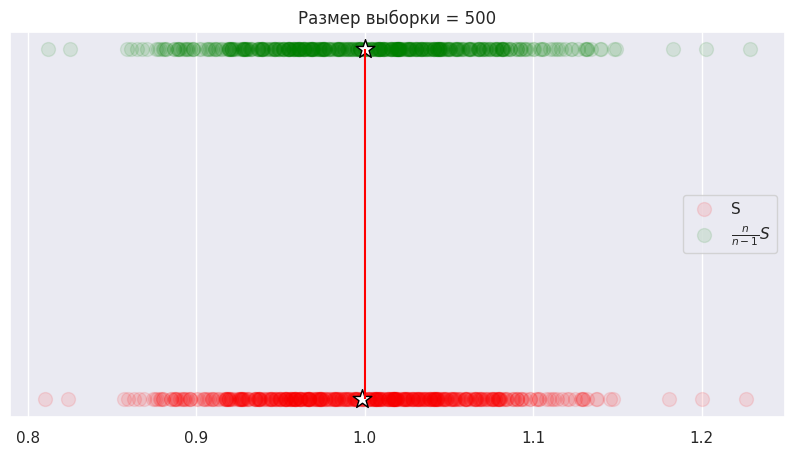

In [4]:
k = 500
sigma = 1
shapes = [10, 100, 500]

for n in shapes:
    X = np.random.normal(scale=sigma, size=(k, n))
    S = 1 / n * np.sum((X - np.mean(X, axis=1).reshape((k, 1))) ** 2, axis=1)
    S1 = 1 / (n - 1) * np.sum((X - np.mean(X, axis=1).reshape((k, 1))) ** 2, axis=1)
    plot(k, n, [S, S1])

**2.** Изучим поведение среднего оценок из первого пункта при росте размера выборки. Постройте график зависимости $\widetilde{\theta}$ от $n$ для двух типов оценок. Для вычисления зависимости нужно один раз сгенерировать выборки из пункта 1 достаточно большого размера (не более 500) и посчитать оценки по подвыборкам, используя <a href="https://thetahat.ru/courses/python/03"  target="_top">функции</a> из `numpy`. Использовать циклы, а так же функции, разворачивающиеся в цикл (например, `np.vectorize`), запрещено.

**Решение:**

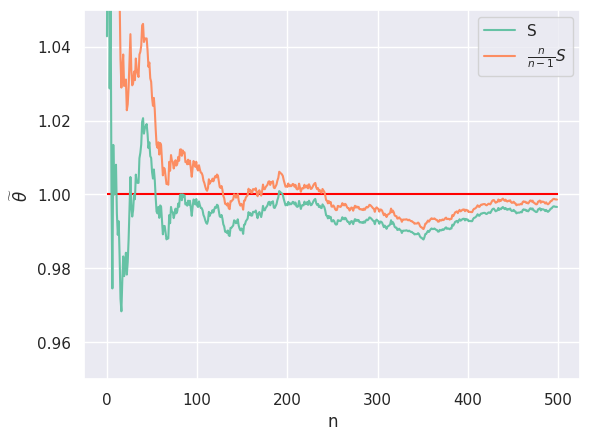

In [5]:
n, k = 500, 100
X = np.random.normal(scale=sigma, size=(k, n))
S = np.mean(
    np.cumsum((X - np.mean(X, axis=1).reshape((k, 1))) ** 2, axis=1)
    / np.arange(1, n + 1).reshape((1, n)),
    axis=0,
)
S1 = np.mean(
    np.cumsum((X - np.mean(X, axis=1).reshape((k, 1))) ** 2, axis=1)[:, 1:]
    / np.arange(1, n).reshape((1, n - 1)),
    axis=0,
)
S1 = np.hstack((S1[0], S1))
plt.hlines(sigma**2, 0, n, color="r")
plt.ylim(0.95, 1.05)
plt.ylabel(r"$\widetilde{\theta}$")
plt.xlabel("n")
sns.lineplot({"S": S, r"$\frac{n}{n-1}S$": S1}, dashes=False)
plt.show()

Сделайте вывод о том, что такое свойство несмещенности. Подтверждают ли сделанные эксперименты полученное в теоретических задачах свойство несмещенности (или отсутствие этого свойства) данных оценок?

*Для ПМФ:* поясните, почему в лабораторных по физике при оценке погрешности иногда используют $n-1$ в знаменателе, а не $n$.

*Замечание.* Для ответа на вопрос достаточно понимания текущего материала, ничего из физики знать не требуется.

**Вывод:**

Используя формулу для оценки дисперсии:
$S^2 = \frac{1}{n-1}\sum_{i=1}^{n}(x_i-\bar{x})^2$,
мы можем увидеть, что при малых значениях $n$ делитель $\frac{1}{n-1}$ вносит существенное искажение в оценку дисперсии. Поэтому для уменьшения этого искажения при малых $n$ используется оценка $\frac{n}{n-1}S^2$.

При больших значениях $n$, делитель $\frac{1}{n-1}$ становится близким к $\frac{1}{n}$ и уже не так сильно искажает результат. Поэтому при больших $n$ можно использовать несмещённую оценку $S^2$.

Таким образом, при проведении физических экспериментов с небольшим количеством измерений для более точной оценки дисперсии целесообразно использовать оценку $\frac{n}{n-1}S^2$.

*Замечание.* Проведенные эксперименты позволяют сделать вывод только о поведении среднего значения оценки, но ничего не говорят о том, насколько велик их разброс относительно среднего.

---
### Задача 3.
---
Рассмотрим задачу построения системы, автоматически классифицирующей поступающие новостные сюжеты на несколько заранее заданных категорий.



Перед выполнением задачи обязательно посмотрите <a href="https://thetahat.ru/courses/ad/main/10/bayes_classification" target="_top">ноутбук</a> с занятия по классификации.

---

С помощью кода ниже загрузите встроенные в `sklearn` <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html#sklearn.datasets.fetch_20newsgroups">данные</a>, в которых представлены различные новостные сюжеты, разделенные на 20 тематических групп.

In [6]:
# удаляем заголовки и подписи
remove = ('headers', 'footers')
# зафиксируем зерно случайности
random_state = 42

# Извлекаем обучающую и тестовую части перемешивая случайным образом
data_train = fetch_20newsgroups(
    subset='train', shuffle=True, random_state=random_state, remove=remove
)
data_test = fetch_20newsgroups(
    subset='test', shuffle=True, random_state=random_state, remove=remove
)

Посмотрим на какое-нибудь сообщение

In [7]:
print(data_train['data'][21])

In article <1993Apr20.151818.4319@samba.oit.unc.edu> Scott.Marks@launchpad.unc.edu (Scott Marks) writes:
>>And of course, Mike Ramsey was (at one time) the captain in Buffalo prior to
>>being traded to Pittsburgh.  Currently, the Penguins have 3 former captains
>>and 1 real captain (Lemieux) playing for them.  They rotate the A's during the
>>season (and even the C while Mario was out).  Even Troy Loney has worn the C
>>for the Pens.
>

I think that Mike Foligno was the captain of the Sabres when he
got traded to the Leafs. Also, wasn't Rick Vaive the captain of
the Leafs when he got traded to Chicago (with Steve Thomas for
Ed Olcyzk and someone). Speaking of the Leafs, I believe that
Darryl Sittler was their captain (he'd torn the "C" off his
jersey but I think he re-claimed the captaincy later on) when he
was traded to the Flyers.

Oh yeah, of course, Gretzky was the captain of the Oilers before
he was traded wasn't he? 


Индекс тематической группы для каждого сообщения

In [8]:
data_train['target']

array([7, 4, 4, ..., 3, 1, 8])

Названия тематических групп

In [9]:
data_train['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

Разделите данные на обучающую, валидационную и тестовую части

In [10]:
df_train = pd.DataFrame(data_train.data, columns=["text"])
df_train["label"] = data_train.target

df_test = pd.DataFrame(data_test.data, columns=["text"])
df_test["label"] = data_test.target

df_train, df_valid = train_test_split(df_train, test_size=0.2)

Прежде чем приступать к построению сложных систем всегда стоит выбрать простой бейзлайн &mdash; модель, которую вы можете получить относительно быстро, и она не занимает много ресурсов.

В качестве бейзлайна рассмотрим простую модель, обученную на представлении текстов в виде мешка слов (bag of words). Мы можем обучить два известных нам классификатора:
* метод ближайших соседей,
* наивный байесовский классификатор.

Подумайте, почему метод ближайших соседей не подходит для решения данной задачи.

Из-за большого количества слов в тексте, то есть много признаков, возникает проблема «проклятия размерности». Это означает, что расстояния между объектами оказываются примерно одинаковыми, что делает сложным определение правильных ближайших соседей. Это может привести к тому, что объекты соседних классов попадут в одну и ту же группу из-за ошибок округления.

Обучите наивный байесовский классификатор, подобрав также для него оптимальные гиперпараметры. В качестве гиперпараметров можно рассмотреть, например, параметры мешка слов.

Для выполнения этой процедуры зафиксируйте несколько комбинаций значений гиперпараметров, для каждой из них обучите модель по обучающей части выборки и посчитайте качество (точность классификации) на валидационной части. Выберите классификатор, дающий максимальную точность.

In [11]:
vectorizers = {}

results = pd.DataFrame(
    columns=["precision"],
    index=pd.MultiIndex.from_product(
        [np.round(np.arange(0, 0.1, 0.02), 2), np.round(np.arange(0, 1, 0.05), 2)],
        names=["min_df", "max_df"],
    ),
)

for min_df in np.arange(0, 0.1, 0.02):
    for max_df in np.arange(5 * min_df, 10 * min_df, 0.05):
        vectorizer = CountVectorizer(min_df=min_df, max_df=max_df)
        vec_df_train = vectorizer.fit_transform(df_train["text"]).toarray()
        vec_df_valid = vectorizer.transform(df_valid["text"]).toarray()

        nb = MultinomialNB()
        nb.fit(vec_df_train, df_train.label)
        results.loc[np.round(min_df, 2), np.round(max_df, 2)] = {
            "precision": accuracy_score(df_valid.label, nb.predict(vec_df_valid))
        }

Посчитайте качество на тестовой выборке.

In [12]:
vectorizer = CountVectorizer(min_df=0.01, max_df=0.05)
vec_df_train = vectorizer.fit_transform(df_train["text"])
vec_df_test = vectorizer.transform(df_test["text"])
nb = MultinomialNB()
nb.fit(vec_df_train, df_train.label)
accuracy_score(df_test.label, nb.predict(vec_df_test))

0.6036909187466808

Выберите некоторую нейросеть для классификации текстов. Вы можете выбрать готовую нейросеть и дообучить ее на рассматриваемых данных, как это сделано на <a href="https://thetahat.ru/courses/ad/main/10/bayes_classification"  target="_top">семинаре</a>, так и самостоятельно написать нейросеть.

In [ ]:
# Загружается предобученный токенизатор BERT с нижним регистром слов
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

train_dataset = Dataset.from_pandas(df_train, preserve_index=False)
valid_dataset = Dataset.from_pandas(df_valid, preserve_index=False)
test_dataset = Dataset.from_pandas(df_test, preserve_index=False)

encoder = OneHotEncoder()
encoder.fit(np.array(train_dataset["label"]).reshape(-1, 1))


In [ ]:
# функция для токенизации текста и кодирования меток
def preprocess_data(data):
    text = data["text"]
    encoding = tokenizer(text, padding="max_length", truncation=True, max_length=128)
    labels_matrix = encoder.transform(np.array(data["label"]).reshape(-1, 1)).toarray()

    encoding["label"] = labels_matrix.tolist()

    return encoding

In [14]:
#Кодируем данные для нашей модели
encoded_train = train_dataset.map(
    preprocess_data, batched=True, remove_columns=train_dataset.column_names
)
encoded_valid = valid_dataset.map(
    preprocess_data, batched=True, remove_columns=valid_dataset.column_names
)
encoded_test = test_dataset.map(
    preprocess_data, batched=True, remove_columns=test_dataset.column_names
)

Map: 100%|██████████| 7532/7532 [00:01<00:00, 4547.94 examples/s]


In [21]:
#Выберем модель и будем обучать ее с помощью cuda. Так же посмотрим на ее параметры.
model = AutoModelForSequenceClassification.from_pretrained(
    "bert-base-uncased", problem_type="multi_label_classification", num_labels=20
)

args = TrainingArguments(
    output_dir="distilbert-base-uncased",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=4,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="hamming_loss",
    greater_is_better=False,
)

model.to(torch.device("cuda"))

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
#Введем теперь метрики.
def multi_labels_metrics(predictions, labels, threshold=0.5):
    sigmoid = torch.nn.Sigmoid()
    probs = sigmoid(torch.Tensor(predictions))
    y_pred = np.zeros(probs.shape)
    y_pred[np.where(probs >= threshold)] = 1
    y_true = labels
    roc_auc = roc_auc_score(y_true, y_pred, average="macro")
    accuracy = accuracy_score(y_true, y_pred)
    hamming = hamming_loss(y_true, y_pred)
    metrics = {"roc_auc": roc_auc, "hamming_loss": hamming, "accuracy": accuracy}
    return metrics


def compute_metrics(p: EvalPrediction):
    preds = p.predictions[0] if isinstance(p.predictions, tuple) else p.predictions
    result = multi_labels_metrics(predictions=preds, labels=p.label_ids)
    return result

In [25]:
#дообучим модель
trainer = Trainer(
    model,
    args,
    train_dataset=encoded_train,
    eval_dataset=encoded_valid,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

trainer.train()

Epoch,Training Loss,Validation Loss,Roc Auc,Hamming Loss,Accuracy,Runtime,Samples Per Second,Steps Per Second
1,0.085500,0.074441,0.812313,0.023464,0.642952,12.892400,175.529000,21.951000
2,0.050300,0.055020,0.890828,0.016836,0.789218,12.849800,176.112000,22.024000
3,0.027500,0.049486,0.907354,0.014825,0.823243,13.086300,172.929000,21.626000
4,0.014100,0.048738,0.911846,0.014582,0.831639,13.012500,173.909000,21.748000


TrainOutput(global_step=4528, training_loss=0.04917130977336594, metrics={'train_runtime': 821.9149, 'train_samples_per_second': 44.048, 'train_steps_per_second': 5.509, 'total_flos': 2381803034333184.0, 'train_loss': 0.04917130977336594, 'epoch': 4.0})

Сравните качество моделей на тестовой выборке. Можно ли с уверенностью утверждать, что одна из моделей лучше другой?

In [27]:
preds = []
for example in valid_dataset:
    text = example["text"]
    text = text[:512]
    encoding = tokenizer(text, return_tensors="pt")
    encoding = {k: v.to(trainer.model.device) for k, v in encoding.items()}

    outputs = trainer.model(**encoding)
    logits = outputs.logits
    logits.shape
    sigmoid = torch.nn.Sigmoid()
    probs = sigmoid(logits.squeeze().cpu())
    predictions = np.zeros(probs.shape)
    predictions[np.where(probs >= 0.5)] = probs.detach().numpy()[
        np.where(probs.detach().numpy() >= 0.5)
    ]
    preds.append([idx for idx, label in enumerate(predictions) if label != 0.0])

accuracy_score(valid_dataset["label"], [l[0] if len(l) != 0 else 0 for l in preds])

0.8466637207247018

Сделайте выводы.

1. Полученный результат демонстрирует, что после дополнительного обучения нейросеть продемонстрировала повышение качества классификации примерно на 24 %, чему в значительной степени способствовал небольшой объём эпох обучения.
2. Следовательно, наивный байесовский классификатор остаётся применимым инструментом, обеспечивающим удовлетворительную точность решения задачи классификации.
3. Нельзя однозначно заключить, что одна из рассматриваемых моделей превосходит другую по всем показателям.
4. Поскольку при корректном подборе гиперпараметров в ряде случаев нейросетевая модель могла показывать худшие результаты, чем байесовский классификатор, обе методики заслуживают равного внимания.


---
### Задача 4.
---

Пусть $\mathscr{X} = \mathbb{R}^d$ — пространство признаков, $\mathscr{Y} = \{0, 1\}$ — множество классов. Рассматривается квадратичный дискриминантный анализ (QDA), в котором условное распределение $X$ при условии $Y=k$ равно $\mathcal{N}(a_k, \Sigma_k)$. Разделяющей поверхностью между классами $k$ и $\ell$ называется множество точек пространства признаков, для которых вероятность этих двух классов одинакова.

**1.**
Покажите, что в модели QDA разделяющие поверхности в общем случае квадратичны, а в LDA &mdash; линейны между любыми двумя классами.

*Примечание.* В LDA предполагается $\Sigma_1 = ... = \Sigma_k$.

**2.**
Рассмотрим квадратичный дискриминантный анализ при $d=2$. Приведите примеры таких параметров $a_k, \Sigma_k$ и вероятностей $\mathsf{P}(Y = k)$, при которых разделяющая поверхность является
* гиперболой;
* параболой;
* двумя параллельными прямыми;
* двумя пересекающимися прямыми.

*Примечание.* Можно подобрать выборку, посчитать оценки со страшными числами. Но еще лучше &mdash; немного подумать и привести пример с "красивыми" числами без какого-либо подбора выборки. В данном случае это довольно просто, а также позволяет лучше разобраться в параметрах многомерного нормального распределения.


---

**1.**
Для случая LDA обозначим $\forall i \Sigma_i=\Sigma$. Для плотности распределения имеем:

$$f_k(x)=\frac{1}{(2\pi)^\frac{d}{2}|\Sigma|^\frac{1}{2}}\exp\left[-\frac{1}{2}(x-a_k)^T \Sigma^{-1} (x-a_k)\right]$$

Для вероятности можно записать ($\pi_k$ - вероятность $P(Y=k)$): $P(Y=k\vert X=x)=\frac{\pi_k f_k(x)}{\sum_{j=1}^N f_j(x)}$

Для удобства, чтобы перейти от произведений к суммированию, будем брать логарифмы, в силу его монотонности имеем право так делать.

Тогда логарифм данного выражения, обозначив его $F_k(x)=\ln f_k(x)=\ln{\pi_k}-\frac{1}{2}(x-a_k)^T \Sigma^{-1} (x-a_k)+const$

Теперь наша цель найти фактически поверхности пересечения $F_k(x)=F_j(x)$:

$$\ln{\pi_k}-\frac{1}{2}(x-a_k)^T \Sigma^{-1} (x-a_k)=\ln{\pi_j}-\frac{1}{2}(x-a_j)^T \Sigma^{-1} (x-a_j)$$ 


$$ \ln\frac{\pi_k}{\pi_j}=\frac{1}{2}(x^T \Sigma^{-1}(a_j-a_k)+(a_j-a_k)^T\Sigma^{-1}x+a_k^T \Sigma^{-1} a_k-a_j^T \Sigma^{-1} a_j)=(a_j-a_k)\Sigma^{-1}x+\frac{1}{2}(a_k^T \Sigma^{-1} a_k-a_j^T \Sigma^{-1} a_j)$$

Все члены линейные, значит пересечние по линейной поверхности

В общем случае QDA сигмы будут различны, а значит:

$$\ln{\pi_k}-\frac{1}{2}(x^T \Sigma_k^{-1}x - x^T \Sigma_k^{-1} a_k-a_k^T \Sigma_k^{-1}x+a_k^T \Sigma_k^{-1} a_k+\ln|\Sigma_k|)=\ln{\pi_j}-\frac{1}{2}(x^T \Sigma_j^{-1}x - x^T \Sigma_j^{-1} a_j-a_j^T \Sigma_j^{-1}x+a_j^T \Sigma_j^{-1} a_j+\ln|\Sigma_j|)$$

$$\ln{\pi_k}-\frac{1}{2}(x^T \Sigma_k^{-1}x - 2a_k^T \Sigma_k^{-1}x+a_k^T \Sigma_k^{-1} a_k+\ln|\Sigma_k|)=\ln{\pi_j}-\frac{1}{2}(x^T \Sigma_j^{-1}x - 2a_j^T \Sigma_j^{-1}x+a_j^T \Sigma_j^{-1} a_j+\ln|\Sigma_j|)$$

За счет различности сигм, получаем поверхности второго порядка.

**2.**
Теперь считаем признаки не зависимыми, опять же для дальнейшего удобства:

$$\Sigma_k^{-1}=\left(\begin{array}{cc}\alpha_1 & 0 \\ 0 & \alpha_2\end{array}\right)\qquad \Sigma_j^{-1}=\left(\begin{array}{cc}\beta_1 & 0 \\ 0 & \beta_2\end{array}\right)$$

Чтобы ушла часть логарифмов, сделаем случаи равновероятными $\pi_k=\pi_j=\frac{1}{2}$. Тогда:

$$\alpha_1 x^2+\alpha_2 y^2 - 2a_{k1}\alpha_1 x-2a_{k2}\alpha_2 y+\alpha_1 a_{k1}^2+\alpha_2 a_{k2}^2-\ln\alpha_1\alpha_2=\beta_1 x^2+\beta_2 y^2 - 2a_{j1}\beta_1 x-2a_{j2}\beta_2 y+\beta_1 a_{j1}^2+\beta_2 a_{j2}^2-\ln\beta_1\beta_2$$

$$(\alpha_1-\beta_1)x^2+(\alpha_2-\beta_2)y^2-2(a_{k1}\alpha_1-a_{j1}\beta_1)x-2(a_{k2}\alpha_2-a_{j2}\beta_2)y=\ln\frac{\alpha_1\alpha_2}{\beta_1\beta_2}+\beta_1 a_{j1}^2+\beta_2 a_{j2}^2-\alpha_1 a_{k1}^2-\alpha_2 a_{k2}^2$$

Как видим многое удобно занулять, поэтому так и будем делать.

Гипербола: $\alpha_1=\beta_2=2$, $\alpha_2=\beta_1=1$, $a_{k1}=a_{k2}=0$, $a_{j1}=a_{j2}=1$.

$x^2-y^2+2x+4y=3$


Парабола: $\alpha_1=2$, $\alpha_2=\beta_1=\beta_2=1$, $a_{k1}=a_{k2}=0$, $a_{j1}=a_{j2}=1$.

$x^2+2x+2y=\ln{2}+2$

Параллельные прямые: $\alpha_1=\beta_1=\beta_2=1$, $\alpha_2=2$, $a_{k1}=a_{k2}=a_{j1}=0$, $a_{j2}=1$.

$(y+1)^2=\ln{2}+3$

Пересекающиеся прямые: $\alpha_1=\beta_2=2$, $\alpha_2=\beta_1=1$, $a_{j2}=a_{k1}=1$, $a_{k2}=a_{j1}=0$:

$ (x-2)^2-(y-2)^2=0$ 